# Project 3: Stellar Atmopsheres : The Physics of Why A stars have strong(est) Balmer Lines?

NAME: 

UTEID: 

DATE:


Goals: The goal of this project is to use our understanding of the physics of stellar atmopsheres to figure out why A stars (with Temperatures near 10,000 K) have very strong balmer lines. 

Data sets: None


Lets begin by loading our libraries: 



In [1]:
#lets make a plots interactive
%matplotlib inline 

#Importing libraries 
import numpy as np
import matplotlib.pyplot as p
import astropy
from astropy.table import Table
import scipy.stats
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.coordinates import Galactic
from astropy.coordinates import ICRS
import astropy.coordinates as apycord
import random
from cycler import cycler
import astropy.table

#Lets set some of the default parameters for plotting. This cell is not needed but i like to style my plots.
p.rc('axes',prop_cycle=(cycler('color', ['k','b','g','r','c','m','y'])))
p.rcParams['lines.linewidth']= 1.5
p.rcParams['axes.linewidth']=2.0
#---comment (or remove) this block if you do not have latex----
p.rcParams['text.usetex']= True
p.rcParams['mathtext.fontset']= 'custom'
p.rcParams['mathtext.default']= 'rm'
p.rcParams['axes.formatter.use_mathtext']=False
#----------------------------------------
p.rcParams['font.size']= 15.0
p.rcParams['axes.labelsize']=16.0
p.rcParams['axes.unicode_minus']=False
p.rcParams['xtick.major.size']=6
p.rcParams['xtick.minor.size']=3
p.rcParams['xtick.major.width']=1.5#2.0
p.rcParams['xtick.minor.width']=1.0
p.rcParams['axes.linewidth']=2.5
p.rcParams['axes.titlesize']=20#'large'
p.rcParams['xtick.labelsize'] = 20#'x-large' # fontsize of the tick labels
p.rcParams['ytick.labelsize']=20 #'x-large'
p.rcParams['ytick.major.width']=2.0 #4
p.rcParams['ytick.minor.width']=1.0 #2.0

## Define the constants in CGS
Lets begin by defining some key constants in CGS (speed of light, boltzmaaan constant, electron mass, planck's constant, ...

In [2]:
#5pts
c = 3.0E-8  #speed of light 
k = 1.3807E-16
evtoerg = 1.6E-12
me = 9.109E-28 #electorn mass
h = 6.62617E-27 #plancks constant
Rh = 10973731.568E2 #rydberg constant


# Coding up the Boltzmann Equation
Lets write a defintion that take as input the the energy differences between two levels, the temperature of the gas and the density of states, and any other key information and outputs the ratio of the number density of atoms/ion in energy state A versus that of B. 

In [3]:
# 5pts
def Boltzmann_Eq(dE,T,g1,g2):
    NANB = (g2/g1)*np.exp(-dE/(k*T))
    return NANB


Q1: Determine the ratio of the H atoms which are at N=2 vs those at N=1 for a H gas at the temperature of the solar photosphere (5777K) (2pts)


In [4]:
#insert answer / calculation here
g1 = 2*1**2
g2 = 2*2**2
dE = 10.2 * evtoerg #13.6-10.2
T = 5777
print('A1 = %e'%Boltzmann_Eq(dE,T,g1,g2))

A1 = 5.201545e-09


A1: 5.2E-9 (that is virtually all all atoms are in ground state; see above)

Q2: Determine the ratio of the H atoms which are at N=2 vs those at N=1 for a H gas at the temperature an EXTREAMLY hot H gaseous photosphere (85,000K) (2pts)


In [5]:
#insert answer / calculation here
g1 = 2*1**2
g2 = 2*2**2
dE = 10.2 * evtoerg #13.6-10.2
T = 85000
print('A2 = %.3f'%Boltzmann_Eq(dE,T,g1,g2))

A2 = 0.996


A2: ~1.0 (that is nearly half of the atoms are excited at N=2; see above)

## Coding up the Partition Function
In order to determine to fraction of total population of atoms/ion at N=2 we need to know the total number of atoms across all states (via the partition function). Next write a function/definition that derives the parition functions given a temperature and the number of levels (num_levels) to sum over. 

In [6]:
#10 pts
def partition_function(T, num_levels=2):
    #enter answer here
    Z = [] #lets make an empty list that we will fill with the individual terms of the partition function to sum
    ni = np.arange(1,num_levels+1,1) #make an array of states (n) that we will sum over
    for i in np.arange(len(ni)): #lets loop over each state and 
        gi = 2*ni[i]**2 #density of states is = 2n^2
        #Ei = (h*c*Rh)/ni[i]**2 #The erergy of the level is defined by the Rydberg formula 
        Ei = -((13.6/ni[i]**2) - 13.6) * evtoerg
        Z.append(gi*np.exp(-Ei/(k*T))) #append result of the boltzman factor * density of states to the list
    Z = sum(Z) #add all the terms of the parition function together
    return Z #return the sum (i.e. the partition function)

Q3: What is the partition function of a pure HI gas that is 10,000K when summing over just the first 2 energy level? (2pts)

In [7]:
#enter calculation here
partition_function(T=10000,num_levels=2)

2.000058842291619

In [8]:
A3: 2.000058

Q4: What is the partition function of a pure HI gas that is 10,000K when summing over just the first 5 energy level? (2pts)

In [9]:
partition_function(T=10000,num_levels=5)

2.0000993675558045

In [10]:
A4: 2.0000993

Use what you have learned above to write down a function which defines the fraction of atoms in N=2 (i.e. $\frac{n2}{n_{tot}}$)

In [11]:
#10 pts
def Boltzmann_frac(n,T,num_levels=2):
    gn = 2*n**2 
    En = -((13.6/n**2) - 13.6) * evtoerg
    Z = partition_function(T=T,num_levels=num_levels)
    print(Z)
    frac_B = gn*np.exp(-En/(k*T))/Z
    
    return frac_B

Q5: Determine the fraction of atoms/ion in a pure H gas of temperature of the gas  T~85000 K that are in the fundemental state (n=1). (2pts)

In [12]:
#insert answer here; 5pts
print(Boltzmann_frac(n=1,T=8.5E4,num_levels=2))


3.991409282279179
0.5010761509423453


A5: Pure H gas at  T~85000 K has about 50 % that are in the fundemental state (n=1) 

## Plotting the Boltzmann Equation

For a pure H gas, plot the fraction of atoms/ions that are in the ground (n=1) state as a function of the temperature of the gas (the temperature should range from 500 to 100,000 K). On the same figure, plot the first excited (i.e. Balmer; n=2) state using a different colored line. For this task you can sum over the first 2 energy levels for the partition function. Make sure to label your plot and provide axis labels.

[2.         2.         2.         ... 4.45320898 4.45323798 4.45326698]
[2.         2.         2.         ... 4.45320898 4.45323798 4.45326698]


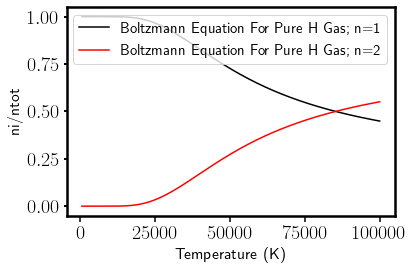

In [13]:
#insert answer here 10pts
Temps = np.arange(500,100000,1)
p.close('all')
frac_1 = Boltzmann_frac(n=1,T=Temps,num_levels=2)
frac_2 = Boltzmann_frac(n=2,T=Temps,num_levels=2)
#frac_3 = Boltzmann_frac(n=3,T=Temps,num_levels=2)

p.figure()
p.plot(Temps,frac_1, 'k-',label='Boltzmann Equation For Pure H Gas; n=1')
p.plot(Temps,frac_2, 'r-',label='Boltzmann Equation For Pure H Gas; n=2')
#p.plot(Temps,frac_3, 'c-',label='Boltzmann Equation For Pure H Gas; n=3')

p.ylabel('ni/ntot') ; p.xlabel('Temperature (K)')
p.legend()
p.tight_layout()



# Coding up the Saha Equation
Lets write a defintion that take as input the temperature of the gas, the number of levels to sum the partition function over, the ionization energy of the H gas and the number density of electrons in the gas and outputs the ratio of the number of atoms of H in neutral vs singly ionized. 

In [14]:
# answer here 5pts
def saha_Eq(T=10000,num_levels=2,xi=13.6,ne=2E12):
    xi *= evtoerg #converts eV to ergs
    ZII = 1 #from class
    ZI = partition_function(T=T,num_levels=num_levels)
    NIINI = ( (2*ZII)/(ne*ZI) )  * ( (2*np.pi*me*k*T)/(h**2) )**1.5 * np.exp(-xi/(k*T))
    return NIINI


Q6: Using the above definition determine how much of a pure H gas at 5777K with an electron density of 10$^{12}$ cm$^{-2}$ is singly ionized. For simiplicity just sum of 2 energy levels in the partition function. (2pts)

In [15]:
#Compute Q6 here
NIINI = saha_Eq(T=5777,num_levels=2,xi=13.6,ne=1E12)
frac_NI = 1/(1+NIINI)
#frac_NII = NIINI / (1+NIINI)
print(frac_NI)

0.998497432204036


A6: More than 99% of the HI gas is nuetral at the solar surface. 

Q7: Using the above definition determine how much of a pure H gas at 85,000K with an electron density of 10$^{12}$ cm$^{-2}$ is singly ionized. For simiplicity just sum of 2 energy levels in the partition function. (2pts)

In [16]:
#Compute Q7 here
NIINI = saha_Eq(T=85000,num_levels=2,xi=13.6,ne=1E12)
frac_NI = 1/(1+NIINI)
#frac_NII = NIINI / (1+NIINI)
print(frac_NI)

2.1299530828240018e-10


A7: WAY LESS than 1% of the HI gas is nuetral at the 85000K which explains why we must account for the Saha equation 

## Visualizing the Saha Equation 

For a pure H gas, plot the fraction of HI atoms as in the gas as function of the temperature of the gas (the temperature should range from 500 to 100,000 K). On the same figure (but with a different line color), plot the fraction of HII atoms as in the gas as function of the temperature of the gas (the temperature should range from 500 to 100,000 K)  For this task you can sum over the first 2 energy levels for the partition function. Make sure to label your plot and provide axis labels.

For this, assume that the pure H gas has an electron pressure of P$_e$ = 200 dyn cm$^{-2}$ (similar electron pressure in stars) and behaves like an ideal gas. 

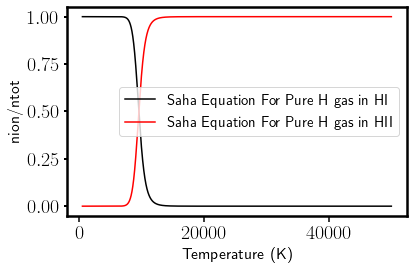

In [17]:
#insert answer here 10pts
p.figure()
Temps = np.arange(500,50000,1)
Pe = 200 #dyne/cm^2
ne = Pe/(k*Temps)
NII_NI = saha_Eq(T=Temps,num_levels=2,xi=13.6,ne=ne)
frac_NI_tot = 1/(1+NII_NI)
frac_NII_tot = NII_NI / (1+NII_NI)

p.plot(Temps,frac_NI_tot, 'k-',label='Saha Equation For Pure H gas in HI')
p.plot(Temps,frac_NII_tot, 'r-',label='Saha Equation For Pure H gas in HII')

p.ylabel('nion/ntot') ; p.xlabel('Temperature (K)')
p.legend()
p.tight_layout()

Q8: Using the above figure, at what temperature is more than 50% of this pure H gas singly ionized? (2pts)

A8: 9500 K 

## Putting it all Together: Visualize the Saha and Boltzmann Equations 

Now for the same gas plot the fraction of atoms at N=2 multiplied by the fraction of neutral atoms, i.e.
$\frac{N_1}{N_1+N_2} \times \frac{N_I}{N_I+N_{II}} $ as a function of temperature (ranging between 500, 25,000 K)

The left hand side comes from the Boltzmann Equation while the right hand side comes from the Saha Equation.

[2.         2.         2.         ... 2.07071042 2.07072379 2.07073717]


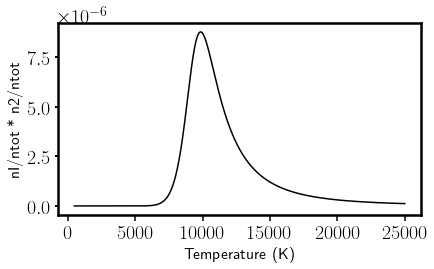

In [18]:
#10 pts
#answer here
p.figure()
Temps = np.arange(500,25000,1)
Pe = 200 #dyne/cm^2
ne = Pe/(k*Temps)
NII_NI = saha_Eq(T=Temps,num_levels=2,xi=13.6,ne=ne)
frac_NI_tot = 1/(1+NII_NI)
frac_NII_tot = NII_NI / (1+NII_NI)
frac_2 = Boltzmann_frac(n=2,T=Temps,num_levels=2)

p.plot(Temps, frac_NI_tot*frac_2,'k-',label='Combined Saha and Boltzmann Equation' )
#p.plot(Temps,frac_NI_tot, 'k-',label='Saha Equation For Pure HI')
#p.plot(Temps,frac_NII_tot, 'r-',label='Saha Equation For Pure HII')

p.ylabel('nI/ntot * n2/ntot') ; p.xlabel('Temperature (K)')
#p.legend()
p.tight_layout()

Q9: Using the above plot, at what temperature is does the fraction of the HI multiplied by the fraction of atoms at n=2 peak (i.e. at what temperature are the balmer lines going to be strongest). Which spectral type of star has this temperature? (4pts)


A9: ~9800K